In [1]:
!pip install voila


In [2]:
!pip install tensorflow keras numpy matplotlib ipywidgets pillow


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [3]:
!python --version


Python 3.13.2


In [4]:
!python -m pip install --upgrade pip


In [5]:
!pip install keras numpy matplotlib ipywidgets pillow

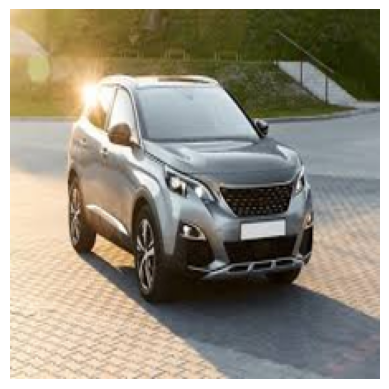

Imagen procesada correctamente: (1, 150528)


In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import StandardScaler


carpeta = r"C:\Users\USER\Downloads\proyecto\imagenes"
nombre_imagen = "carroproyecto1.jpg"
ruta_imagen = os.path.join(carpeta, nombre_imagen)


def cargar_imagen(ruta):
    try:
        img = Image.open(ruta)
        img = img.resize((224, 224))  
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error al cargar la imagen: {e}")


def procesar_imagen(ruta):
    try:
        img = Image.open(ruta).convert('RGB')
        img = img.resize((224, 224))  
        img_array = np.array(img) / 255.0  # Normalización
        img_array = img_array.reshape(1, -1)  
        scaler = StandardScaler()
        img_array = scaler.fit_transform(img_array)  
        return img_array
    except Exception as e:
        print(f"Error al procesar la imagen: {e}")
        return None


if os.path.exists(ruta_imagen):  
    cargar_imagen(ruta_imagen)
    imagen_procesada = procesar_imagen(ruta_imagen)
    if imagen_procesada is not None:
        print("Imagen procesada correctamente:", imagen_procesada.shape)
else:
    print("No se encontró la imagen en la ruta especificada.")



In [12]:
import os


os.makedirs("dataset/gatos", exist_ok=True)
os.makedirs("dataset/perros", exist_ok=True)
os.makedirs("dataset/carros", exist_ok=True)

print("Carpetas creadas correctamente.")


Carpetas creadas correctamente.


In [54]:
import os
from PIL import Image
import numpy as np

def cargar_imagenes(ruta):
    imagenes = []
    for archivo in os.listdir(ruta):
        ruta_completa = os.path.join(ruta, archivo)

        # Omitir directorios como .ipynb_checkpoints
        if not os.path.isfile(ruta_completa):  
            continue

        try:
            img = Image.open(ruta_completa).resize((224, 224))
            imagenes.append(np.array(img))
        except Exception as e:
            print(f"Error con la imagen {ruta_completa}: {e}")

    return np.array(imagenes)

ruta_gatos = "dataset/gatos"
ruta_perros = "dataset/perros"

imagenes_gatos = cargar_imagenes(ruta_gatos)
imagenes_perros = cargar_imagenes(ruta_perros)

print("Imágenes cargadas y preprocesadas correctamente.")


Imágenes cargadas y preprocesadas correctamente.


In [65]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline


ruta_imagenes = r'C:\Users\USER\Downloads\proyecto\dataset'

def cargar_imagenes(ruta_imagenes):
    imagenes = []
    etiquetas = []
    for etiqueta in os.listdir(ruta_imagenes):
        carpeta = os.path.join(ruta_imagenes, etiqueta)
        if os.path.isdir(carpeta):
            for archivo in os.listdir(carpeta):
                if archivo.endswith(('.jpg', '.png')):
                    img = cv2.imread(os.path.join(carpeta, archivo))
                    if img is not None:
                        img = cv2.resize(img, (64, 64))
                        imagenes.append(img.flatten())
                        etiquetas.append(etiqueta)
                    else:
                        print(f"Error al cargar la imagen: {archivo}")
    return np.array(imagenes), np.array(etiquetas)


X, y = cargar_imagenes(ruta_imagenes)


num_clases = len(np.unique(y))
if num_clases < 2:
    raise ValueError("Se necesitan al menos dos clases para entrenar el modelo.")


test_size = max(1, num_clases)  


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, stratify=y, random_state=42)


n_splits = min(5, np.min(np.unique(y, return_counts=True)[1]))  # No mayor que la clase con menos datos
skf = StratifiedKFold(n_splits=n_splits)


modelo = make_pipeline(PCA(n_components=min(6, X_train.shape[1])), SVC(kernel="linear"))

# Entrenar el modelo
modelo.fit(X_train, y_train)


scores = cross_val_score(modelo, X_scaled, y, cv=skf)
print(f"Precisión media de la validación cruzada: {scores.mean() * 100:.2f}%")
print(f"Desviación estándar de la precisión: {scores.std() * 100:.2f}%")


precision = modelo.score(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {precision * 100:.2f}%")








Precisión media de la validación cruzada: 38.89%
Desviación estándar de la precisión: 5.56%
Precisión en el conjunto de prueba: 20.00%


In [ ]:
import os

ruta_gatos = "dataset/gatos"
ruta_perros = "dataset/perros"

print("Número de imágenes en la carpeta de gatos:", len(os.listdir(ruta_gatos)))
print("Número de imágenes en la carpeta de perros:", len(os.listdir(ruta_perros)))


In [ ]:
import os

ruta_gatos = "dataset/gatos"
ruta_perros = "dataset/perros"

# Filtrar solo archivos de imagen (ignorando .ipynb_checkpoints y otros archivos no válidos)
imagenes_gatos = [f for f in os.listdir(ruta_gatos) if f.endswith((".jpg", ".png", ".jpeg"))]
imagenes_perros = [f for f in os.listdir(ruta_perros) if f.endswith((".jpg", ".png", ".jpeg"))]

print("Número de imágenes en la carpeta de gatos:", len(imagenes_gatos))
print("Número de imágenes en la carpeta de perros:", len(imagenes_perros))



In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Función para obtener la primera imagen válida en una carpeta
def obtener_imagen_valida(ruta_carpeta):
    for archivo in os.listdir(ruta_carpeta):
        if archivo.lower().endswith((".png", ".jpg", ".jpeg")):  # Solo imágenes
            return os.path.join(ruta_carpeta, archivo)
    return None  # No encontró imágenes


ruta_gatos = "dataset/gatos"
ruta_perros = "dataset/perros"


archivo_gato = obtener_imagen_valida(ruta_gatos)
archivo_perro = obtener_imagen_valida(ruta_perros)

if archivo_gato and archivo_perro:  # Verifica si encontró imágenes
    imagen_gato = Image.open(archivo_gato)
    imagen_perro = Image.open(archivo_perro)


    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    axs[0].imshow(imagen_gato)
    axs[0].axis("off")
    axs[0].set_title("Gato")

    axs[1].imshow(imagen_perro)
    axs[1].axis("off")
    axs[1].set_title("Perro")

    plt.show()
else:
    print("No se encontraron imágenes en las carpetas.")


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


carpeta_base = "dataset"  # Asegúrate de que aquí están las carpetas "gatos" y "perros"


img_size = (100, 100)


imagenes = []
etiquetas = []


for categoria in ["gatos", "perros"]:
    carpeta = os.path.join(carpeta_base, categoria)
    etiqueta = 0 if categoria == "gatos" else 1
    
    for archivo in os.listdir(carpeta):
        ruta_img = os.path.join(carpeta, archivo)
        img = cv2.imread(ruta_img)  # Leer imagen
        if img is not None:
            img = cv2.resize(img, img_size)  # Redimensionar
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convertir a escala de grises
            imagenes.append(img.flatten())  # Convertir a vector 1D
            etiquetas.append(etiqueta)


imagenes = np.array(imagenes)
etiquetas = np.array(etiquetas)


X_train, X_test, y_train, y_test = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=42)

print("✅ Imágenes cargadas y divididas correctamente")



In [35]:
import os
print(os.getcwd())


C:\Users\USER\Downloads\proyecto


In [ ]:
!pip install opencv-python

In [50]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


carpeta_base = "dataset"  #

# Tamaño de las imágenes
img_size = (100, 100)


imagenes = []
etiquetas = []


for categoria in ["gatos", "perros"]:
    carpeta = os.path.join(carpeta_base, categoria)
    etiqueta = 0 if categoria == "gatos" else 1
    
    if not os.path.exists(carpeta):
        print(f"⚠️ La carpeta {categoria} no existe en {carpeta_base}.")
        continue
    
    for archivo in os.listdir(carpeta):
        if archivo.lower().endswith((".png", ".jpg", ".jpeg")):  # Filtrar solo imágenes
            ruta_img = os.path.join(carpeta, archivo)
            img = cv2.imread(ruta_img)  # Leer imagen
            if img is not None:
                img = cv2.resize(img, img_size)  # Redimensionar
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convertir a escala de grises
                imagenes.append(img.flatten())  # Convertir a vector 1D
                etiquetas.append(etiqueta)


imagenes = np.array(imagenes)
etiquetas = np.array(etiquetas)


X_train, X_test, y_train, y_test = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=42)

print("✅ Imágenes cargadas y divididas correctamente")


✅ Imágenes cargadas y divididas correctamente


In [39]:
!pip install ultralytics



image 1/1 C:\Users\USER\Downloads\proyecto\dataset\gatos\gatoproyecto.jpg: 448x640 1 cat, 28.8ms
Speed: 2.1ms preprocess, 28.8ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)
✅ Se detectó un gato en gatoproyecto.jpg.


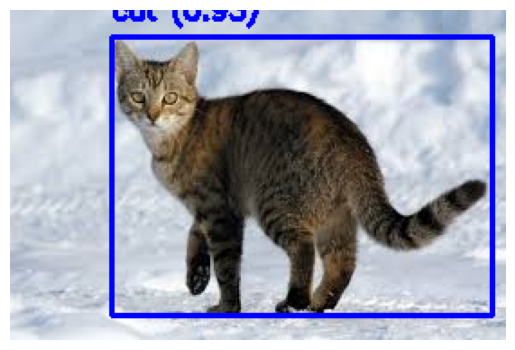


image 1/1 C:\Users\USER\Downloads\proyecto\dataset\perros\perroproyecto1.jpg: 448x640 1 dog, 27.5ms
Speed: 1.4ms preprocess, 27.5ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)
✅ Se detectó un perro en perroproyecto1.jpg.


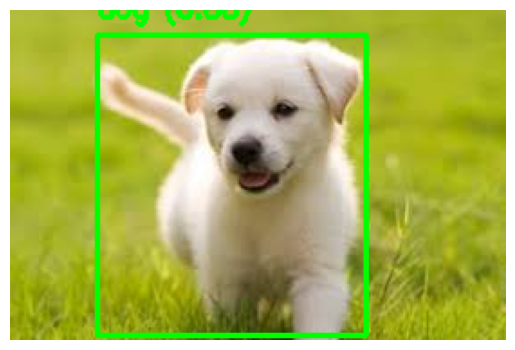


image 1/1 C:\Users\USER\Downloads\proyecto\dataset\carros\carroproyecto1.jpg: 448x640 1 car, 28.0ms
Speed: 1.0ms preprocess, 28.0ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)
✅ Se detectó un carro en carroproyecto1.jpg.


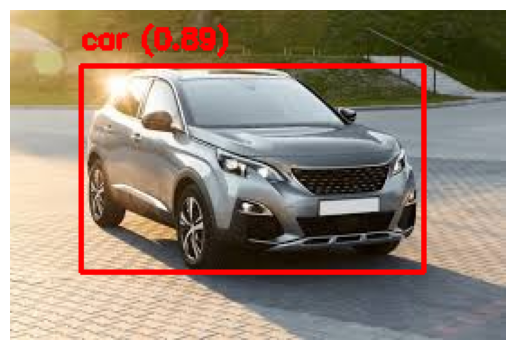


image 1/1 C:\Users\USER\Downloads\proyecto\dataset\otros\personaproyecto.jpg: 384x640 1 person, 35.1ms
Speed: 1.0ms preprocess, 35.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
❌ No se detectó ni un perro, ni un gato, ni un carro en personaproyecto.jpg.


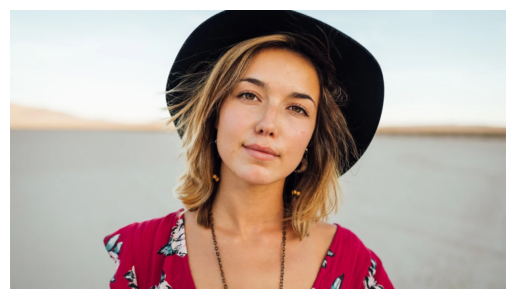

In [48]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os


modelo = YOLO("yolov8n.pt")  


carpetas = {
    "dog": "dataset/perros/",
    "cat": "dataset/gatos/",
    "car": "dataset/carros/",
    "otros": "dataset/otros/" 
}

def detectar_animales(nombre_imagen):
    ruta_imagen = None

    
    for carpeta in carpetas.values():
        posible_ruta = os.path.join(carpeta, nombre_imagen)
        if os.path.exists(posible_ruta):
            ruta_imagen = posible_ruta
            break

    if ruta_imagen is None:
        print(f"❌ No se encontró la imagen {nombre_imagen} en ninguna carpeta.")
        return

    # Cargar imagen
    img = cv2.imread(ruta_imagen)
    if img is None:
        print(f"❌ No se pudo cargar la imagen {nombre_imagen}. Verifica la ruta.")
        return

   
    resultados = modelo(ruta_imagen)

 
    detecto_perro = False
    detecto_gato = False
    detecto_carro = False

   
    for resultado in resultados:
        for box in resultado.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  
            clase = int(box.cls[0]) 
            confianza = box.conf[0].item()  

         
            nombre_clase = modelo.names[clase]

            # Definir color y marcar detecciones
            if nombre_clase == "dog":
                color = (0, 255, 0)  # Verde
                detecto_perro = True
            elif nombre_clase == "cat":
                color = (255, 0, 0)  # Azul
                detecto_gato = True
            elif nombre_clase == "car":
                color = (0, 0, 255)  # Rojo
                detecto_carro = True
            else:
                continue  # Si no es perro, gato o carro, ignorarlo

            cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
            cv2.putText(img, f"{nombre_clase} ({confianza:.2f})", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

  
    if detecto_perro:
        print(f"✅ Se detectó un perro en {nombre_imagen}.")
    if detecto_gato:
        print(f"✅ Se detectó un gato en {nombre_imagen}.")
    if detecto_carro:
        print(f"✅ Se detectó un carro en {nombre_imagen}.")
    if not (detecto_perro or detecto_gato or detecto_carro):
        print(f"❌ No se detectó ni un perro, ni un gato, ni un carro en {nombre_imagen}.")

  
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()



detectar_animales("gatoproyecto.jpg")
detectar_animales("perroproyecto1.jpg")
detectar_animales("carroproyecto1.jpg")
detectar_animales("personaproyecto.jpg")  






In [51]:
import os
print(os.path.exists("haarcascade_frontalcatface_extended.xml"))
print(os.path.exists("haarcascade_frontalface_alt.xml"))


True
True


In [27]:
ruta_imagenes = r'C:\Users\USER\Downloads\proyecto\imagenes'

if os.path.exists(ruta_imagenes):
    print("La carpeta de imágenes existe y está accesible")
else:
    print("La carpeta de imágenes no está accesible")



La carpeta de imágenes existe y está accesible


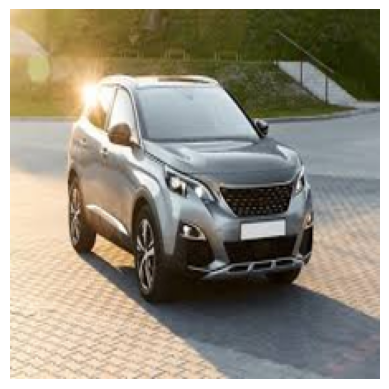

Imagen procesada correctamente: (1, 150528)


In [69]:

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import StandardScaler


carpeta = r"C:\Users\USER\Downloads\proyecto\imagenes"
nombre_imagen = "carroproyecto1.jpg"
ruta_imagen = os.path.join(carpeta, nombre_imagen)


def cargar_imagen(ruta):
    try:
        img = Image.open(ruta)
        img = img.resize((224, 224))  
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error al cargar la imagen: {e}")


def procesar_imagen(ruta):
    try:
        img = Image.open(ruta).convert('RGB')
        img = img.resize((224, 224))  
        img_array = np.array(img) / 255.0  # Normalización
        img_array = img_array.reshape(1, -1)  
        scaler = StandardScaler()
        img_array = scaler.fit_transform(img_array)  
        return img_array
    except Exception as e:
        print(f"Error al procesar la imagen: {e}")
        return None


if os.path.exists(ruta_imagen):  
    cargar_imagen(ruta_imagen)
    imagen_procesada = procesar_imagen(ruta_imagen)
    if imagen_procesada is not None:
        print("Imagen procesada correctamente:", imagen_procesada.shape)
else:
    print("No se encontró la imagen en la ruta especificada.")



In [68]:
for etiqueta in os.listdir(ruta_imagenes):
    carpeta = os.path.join(ruta_imagenes, etiqueta)
    if os.path.isdir(carpeta):
        print(f"Carpeta detectada: {etiqueta}, contiene {len(os.listdir(carpeta))} archivos")



Carpeta detectada: .ipynb_checkpoints, contiene 0 archivos
Carpeta detectada: carros, contiene 5 archivos
Carpeta detectada: gatos, contiene 5 archivos
Carpeta detectada: imagenes, contiene 7 archivos
Carpeta detectada: Otros, contiene 4 archivos
Carpeta detectada: perros, contiene 5 archivos


In [67]:
if len(np.unique(y)) < 2:
    raise ValueError("Error: Se necesita al menos dos clases para entrenar el modelo.")
